# Introduction to Keras
Turing QIU/Yvonne ZHANG/Ryan WANG

Last modified in 2019/09/25 - 22:38

![keras_logo](keras.png)

## Introduction
Keras is a high-level neural networks API, written in Python and capable of running on top of *TensorFlow, CNTK, or Theano*. It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.

Use Keras if you need a deep learning library that:

- Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
- Supports both convolutional networks and recurrent networks, as well as combinations of the two.
- Runs seamlessly on CPU and GPU.

Keras is compatible with: Python **2.7-3.6**.



### Why this name, Keras?
Keras (κέρας) means horn in Greek. It is a reference to a literary image from ancient Greek and Latin literature, first found in the Odyssey, where dream spirits (Oneiroi, singular Oneiros) are divided between those who deceive men with false visions, who arrive to Earth through a gate of ivory, and those who announce a future that will come to pass, who arrive through a gate of horn. It's a play on the words κέρας (horn) / κραίνω (fulfill), and ἐλέφας (ivory) / ἐλεφαίρομαι (deceive).

Keras was initially developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System).

*"Oneiroi are beyond our unravelling --who can be sure what tale they tell? Not all that men look for comes to pass. Two gates there are that give passage to fleeting Oneiroi; one is made of horn, one of ivory. The Oneiroi that pass through sawn ivory are deceitful, bearing a message that will not be fulfilled; those that come out through polished horn have truth behind them, to be accomplished for men who see them." Homer, Odyssey 19. 562 ff (Shewring translation).*


## Installation of Keras
In this course, we recommend to use the TensorFlow as the backend of Keras. If you are intersted in the installation of other backends, please find the resources in the following links.

- [TensorFlow installation instructions](https://www.tensorflow.org/install/#tensorflow) 
- [Theano installation instructions](http://deeplearning.net/software/theano/install.html#install) 
- [CNTK installation instructions](https://docs.microsoft.com/en-us/cognitive-toolkit/setup-cntk-on-your-machine) 

### · Install Keras from Terminal (Mac OS):

In this section, we will introduce the installation of Keras in Mac OS by terminal. First of all, we need to install the TensorFlow backend by using the pip instruction:

`
pip3 install tensorflow
`

Then, you can install Keras itself by pip:

`
pip3 install keras
`

If the installations of TensorFlow and Keras have been completed successfully, we could test it by `import` in python.

![test_envs](test_envs.png)


### · Install Keras from Anaconda (reconmmended):

First, let's create a new environment in Anaconda (By following Rehan and Justices' material). 

![Create environment](create_envs.png)

Then we need to activate the created environment. There are two ways for you to activate the environment: 

1) Activate the environment by the Anaconda Navigation like this:

![Navigation_Activate](navig_activate.png)

2) Or you want to activate the created environment by Anaconda prompt shown as followed: 

Step 1. List all the environments by instruction.

`
conda info --envs
`

Step 2. activate the target environment (the environment created by yourself).

`
activate xxx
`

By doing these two steps, you will get into the activated environment like followed, which is the same with the interface that activated through Anaconda Navigation.

![activate environment](activate_envs.PNG)


After the environment is activated, we could install the TensorFlow backend by using the pip instruction:

`
pip install tensorflow
`

Then, you can install Keras itself by pip:

`
pip install keras
`

Note: These installation steps assume that you are on Windows. If you are on a Linux or Mac environment, please contact Yvonne and Ziying Wang for help.

### · Alternatively: install Keras from the GitHub source:

First, clone Keras using `git`:

```
git clone https://github.com/keras-team/keras.git
```

Then, `cd` to the Keras folder and run the install command:

```
cd keras
sudo python setup.py install
```



## Get Stated with Keras in MNIST

Before we create our first neural network model in Keras, let us prepare our data first. As the "Hello world" program in deep lenarning, MNIST (Mixed National Institute of Standards and Technology database) dataset has been widely used by the students in DL and ML for their first model construction train and test. Fortunately, Keras provides a convenient module to load the MNIST dataset.

### Introduction to MNIST dataset
The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning. The MNIST database contains 60,000 training images and 10,000 testing images.

![mnist](mnist.png)

### Data review

1. Import modules

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.utils import np_utils

2. Import MNIST modules，and you can load both train and test data set by load_data().

In [20]:
from keras.datasets import mnist

# load mnist dataset
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

print('train data records =', len(x_train_image))
print('test data records =', len(x_test_image))

train data records = 60000
test data records = 10000


3. Display the format of image and label in train dataset: x_train_image has 60,000 pieces of data with a size of 28*28. Y_train_label also contains 60,000 records with 1 dimension.

In [21]:
print('x_train image format =', x_train_image.shape)
print('y_train label format =', len(y_train_label.shape))

x_train image format = (60000, 28, 28)
y_train label format = 1


4.  Define a function to show the mnist data image

Define a function named plot_image() to display the image in the dataset.**Don't worry about this code :)**

In [22]:
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2, 2)
    plt.imshow(image, cmap='binary')
    plt.show()

Using plot_image() to shows the first image of the mnist dataset with the corresponding label.

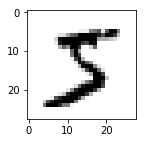

Label:  5


In [23]:
plot_image(x_train_image[0])
print('Label: ', y_train_label[0])

### Data preprocessing

After loading the data, we need to preprocess it. Our data are mainly digital image files and labels in dataset.

* **For image:**

These digital image files are 28 x 28 black-and-white images. We need to convert them into one-dimensional vectors, i.e. 784-length data (28x28x1 = 784, 1 represents a channel, and 3 channels for color RGB).

1). Viewing **Data Dimension**: We can see that the number of images of train dataset is 60,000, and the dimension is 28*28. The number of Labels is also 60,000.

In [24]:
print('x_train_image:', x_train_image.shape)
print('y_train_label:', y_train_label.shape)

x_train_image: (60000, 28, 28)
y_train_label: (60000,)


2). **Convert image data to one dimension**: change the dimension of dataset by using reshape(), and then change data attribute to float with astype(). Finally, we can see that its dimension has become 784.

In [25]:
x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test = x_test_image.reshape(10000, 784).astype('float32')

print('x_train:', x_Train.shape)
print('x_test:', x_Test.shape)

x_train: (60000, 784)
x_test: (10000, 784)


3). Look at **the content of Picture** 0: Each number is between 0 and 255, representing the gray scale-depth of each pixel point.

In [26]:
print(x_train_image[0])
print(x_test_image[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

4). **Standardization of image data**: The process of adjusting the "average" of a set of data to 0 and the "standard deviation" to 1 is called **standardization**. The simplest way to deal with gray scale images is to divide them by 255. Finally, the value of print's No.0 data is found to be between 0 and 1.

In [27]:
x_Train_normalize = x_Train/255
x_Test_normalize = x_Test/255

print(x_Train_normalize[0])
print(x_Test_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

* **For labels:**

Label's data content ranges from 0 to 9, so we can convert it into 10 combinations of 0 or 1, for example, 7 to 0000000100 and 5 to 00000010000. This method is called "One-hot encoding", and is mainly applied to the conversion of classification values.

1. Let's first look at the first five label data in train dataset and find out that the values are 5, 0, 4, 1, 9 and the type is uint8.

In [28]:
y_train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

2. Then we use **np_utils.to_categorical()** to perform one-hot encoding transformation. The first five pieces of data from print show that 5 becomes 00000010000, 0 becomes 1000000000, 4 becomes 0000100000....

In [29]:
y_TrainOneHot = np_utils.to_categorical(y_train_label)
y_TestOneHot = np_utils.to_categorical(y_test_label)

y_TrainOneHot[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

### Loss and accuracy history visulization

Next, let us write a LossHistory class for the visulization of the Loss and Accuracy, **just for fun, no need to worry :)**, you can skip this section rapidly.

In [30]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()


### Get start with Model

The core data structure of Keras is a **model**, a way to organize layers. The simplest type of model is the `Sequential` model, a linear stack of layers. For more complex architectures, you should use the Keras functional API, which allows to build arbitrary graphs of layers.

In [31]:
from keras.models import Sequential

model = Sequential()

Stacking layers is as easy as `.add()`:

In [32]:
from keras.layers import Dense, Dropout, Activation

# Stack the layers into model
# 1st layer: Dense layer
model.add(Dense(500,input_shape=(784,)))
model.add(Activation('tanh'))
model.add(Dropout(0.8))  # 50% dropout
# 2nd layer: Dense layer
model.add(Dense(500))
model.add(Activation('tanh'))
model.add(Dropout(0.8)) # 50% dropout
# 3rd layer: Dense layer
model.add(Dense(500))
model.add(Activation('tanh'))
model.add(Dropout(0.8)) # 50% dropout
# Output layer: Dense layer with Dimension in 10 (one dimension for one category)
# Softmax: Widely used in classification problem, output the probability of each category
model.add(Dense(10))
model.add(Activation('softmax'))


Once your model looks good, configure its learning process with `.compile()`:

In [33]:
# Define the loss function, optimizer (Method used in training, 'sgd' denotes stochastic gradient descent) and record the accuracy for each traning epoch
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

If you need to, you can further configure your optimizer. A core principle of Keras is to make things reasonably simple, while allowing the user to be fully in control when they need to (the ultimate control being the easy extensibility of the source code).

In [34]:
# Customize the model compile (For example, you want to customize the lr (aka learning rate))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

# Create a history instance of our little calss to record the callbacks information during training process
history = LossHistory()

You can now iterate on your training data in batches:

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 95us/step - loss: 1.3601 - acc: 0.5627 - val_loss: 0.4752 - val_acc: 0.8681
Epoch 2/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.7665 - acc: 0.7499 - val_loss: 0.4038 - val_acc: 0.8904
Epoch 3/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.6652 - acc: 0.7891 - val_loss: 0.3721 - val_acc: 0.8994
Epoch 4/100
60000/60000 [==============================] - 5s 85us/step - loss: 0.6150 - acc: 0.8112 - val_loss: 0.3529 - val_acc: 0.9064
Epoch 5/100
60000/60000 [==============================] - 5s 92us/step - loss: 0.5768 - acc: 0.8234 - val_loss: 0.3460 - val_acc: 0.9086
Epoch 6/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.5462 - acc: 0.8340 - val_loss: 0.3347 - val_acc: 0.9114
Epoch 7/100
60000/60000 [==============================] - 5s 83us/step - loss: 0.5287 - acc: 0.8421 - val_loss: 0.3255 - 

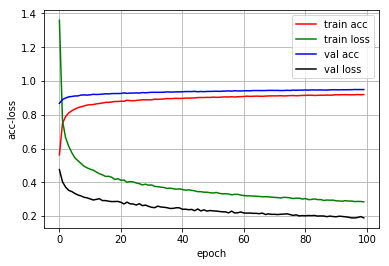

In [35]:
# x_train and y_train are Numpy arrays --just like in the Scikit-Learn API.
model.fit(x_Train_normalize, y_TrainOneHot, epochs=100, verbose=1, batch_size=200, shuffle=True, validation_data=(x_Test_normalize, y_TestOneHot), callbacks=[history])

# Use the small funny class written by us before to plot the learning curve
history.loss_plot('epoch')

If you train the model with 100 epochs, the learning curve should be something like the following figure, and the accuracy in testing set should be 94.96% approximately.


![100epoch](100epoch.png)

Let's back to the model, subsequently, you can start the testing step and evaluate your model's performance:

In [36]:
scores = model.evaluate(x_Test_normalize,y_TestOneHot,batch_size=200,verbose=1)

# scores variable records two indicators of our model: scores[0] - loss; scores[1] - accuracy
print("The accuracy of the model in testing set is %f" % (scores[1]))

10000/10000 [==============================] - 0s 33us/step
The accuracy of the model in testing set is 0.949600


## In the end

Comparing with TensorFlow and other deep learning framework in python, the idea of Keras is that, building a question answering system, an image classification model, a Neural Turing Machine, or any other model is just as fast. The ideas behind deep learning are simple, so why should their implementation be painful?

In the end, let's have a glance on the difference on TensorFlow and Keras, and you will know how nice Keras are.

### Code in Adding a Layer

![tf_vs_keras](tf_vs_keras.png)

However, as a high-level encapusulated package, Keras usually could not provide a promising customization for your network architecture, which means you need a more flexible framework to do so. For example, tensorflow and pytorch.

## Reference

[1] https://keras.io/

[2] https://medium.com/@afozbek_/how-to-train-a-model-with-mnist-dataset-d79f8123ba84

[3] https://blog.csdn.net/wwxy1995/article/details/79852905

[4] https://blog.csdn.net/u013381011/article/details/78911848

[5] https://qffc.org

[6] https://www.researchgate.net/publication/335542449_Hybrid_Chaotic_Radial_Basis_Function_Neural_Oscillatory_Network_HCRBFNON_for_Financial_Forecast_and_Trading_System

## Acknowledge

The authors wants to thank for the help from the UIC Artificial Intelligence Special Interest Group (UICAISIG) in the environment configuration problem, and Prof. Yann LeCun for his magnificant work in the MNIST dataset. Specially, in the yesterday, Mr. Zheng Hao companied with us to finish this material, we also want to thank to him.


![UICAI_Group_Logo.png](UICAI_Group_Logo.png)